# [第7章: 単語ベクトル](https://nlp100.github.io/ja/ch07.html)
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## [60. 単語ベクトルの読み込みと表示](https://nlp100.github.io/ja/ch07.html#60-%E5%8D%98%E8%AA%9E%E3%83%99%E3%82%AF%E3%83%88%E3%83%AB%E3%81%AE%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF%E3%81%A8%E8%A1%A8%E7%A4%BA)
Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
!ls Input/GoogleNews-vectors-negative300.bin

Input/GoogleNews-vectors-negative300.bin


In [2]:
from gensim.models.keyedvectors import KeyedVectors

In [3]:
%%time
wv = KeyedVectors.load_word2vec_format("Input/GoogleNews-vectors-negative300.bin", binary=True)

CPU times: user 1min 15s, sys: 4.99 s, total: 1min 20s
Wall time: 3min 26s


In [4]:
wv["United_States"].shape

(300,)

In [5]:
wv["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## [61. 単語の類似度](https://nlp100.github.io/ja/ch07.html#61-%E5%8D%98%E8%AA%9E%E3%81%AE%E9%A1%9E%E4%BC%BC%E5%BA%A6)
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [6]:
wv.n_similarity(["United_States"], ["U.S."])

0.73107743

## [62. 類似度の高い単語10件](https://nlp100.github.io/ja/ch07.html#62-%E9%A1%9E%E4%BC%BC%E5%BA%A6%E3%81%AE%E9%AB%98%E3%81%84%E5%8D%98%E8%AA%9E10%E4%BB%B6)
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [7]:
print("[Best 10 Cosine Similarities]")
for i, (word, cos_sim) in enumerate(wv.similar_by_word("United_States", topn=10)):
    args = (i+1, word, cos_sim)
    print("[%d/10] %s : %f" % args)

[Best 10 Cosine Similarities]
[1/10] Unites_States : 0.787725
[2/10] Untied_States : 0.754137
[3/10] United_Sates : 0.740072
[4/10] U.S. : 0.731077
[5/10] theUnited_States : 0.640439
[6/10] America : 0.617841
[7/10] UnitedStates : 0.616731
[8/10] Europe : 0.613299
[9/10] countries : 0.604480
[10/10] Canada : 0.601907


## [63. 加法構成性によるアナロジー](https://nlp100.github.io/ja/ch07.html#63-%E5%8A%A0%E6%B3%95%E6%A7%8B%E6%88%90%E6%80%A7%E3%81%AB%E3%82%88%E3%82%8B%E3%82%A2%E3%83%8A%E3%83%AD%E3%82%B8%E3%83%BC)
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [9]:
x_greece = wv["Spain"] - wv["Madrid"] + wv["Athens"]
for i, (word, cos_sim) in enumerate(wv.similar_by_vector(x_greece, topn=10)):
    args = (i+1, word, cos_sim)
    print("[%d/10] %s : %f" % args)

[1/10] Athens : 0.752846
[2/10] Greece : 0.668547
[3/10] Aristeidis_Grigoriadis : 0.549578
[4/10] Ioannis_Drymonakos : 0.536146
[5/10] Greeks : 0.535179
[6/10] Ioannis_Christou : 0.533023
[7/10] Hrysopiyi_Devetzi : 0.508849
[8/10] Iraklion : 0.505926
[9/10] Greek : 0.504062
[10/10] Athens_Greece : 0.503411


## [64. アナロジーデータでの実験](https://nlp100.github.io/ja/ch07.html#64-%E3%82%A2%E3%83%8A%E3%83%AD%E3%82%B8%E3%83%BC%E3%83%87%E3%83%BC%E3%82%BF%E3%81%A7%E3%81%AE%E5%AE%9F%E9%A8%93)
[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [11]:
!ls Input/questions-words.txt

Input/questions-words.txt


In [16]:
%%time
with open("Input/questions-words.txt") as f, open("Output/Chapter07/64.txt", "w") as f_64:
    for line in f:
        line_64 = line.replace("\n", "")

        if line[:2] != ": ":
            elements = line_64.split()
            x = wv[elements[1]] - wv[elements[0]] + wv[elements[2]]
            word, cossim = wv.similar_by_vector(x, topn=1)[0]
            line_64 += " %s %f" % (word, cossim) 

        f_64.write("%s\n" % line_64)

CPU times: user 1h 56min 27s, sys: 12min 22s, total: 2h 8min 50s
Wall time: 1h 5min 20s


## [65. アナロジータスクでの正解率](https://nlp100.github.io/ja/ch07.html#65-%E3%82%A2%E3%83%8A%E3%83%AD%E3%82%B8%E3%83%BC%E3%82%BF%E3%82%B9%E3%82%AF%E3%81%A7%E3%81%AE%E6%AD%A3%E8%A7%A3%E7%8E%87)
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [18]:
with open("Output/Chapter07/64.txt") as f:
    total, correct = 0, 0
    for line in f:
        if line[:2] == ": ":
            continue

        total += 1
        elements = line.replace("\n", "").split()
        if elements[3] == elements[4]:
            correct += 1
    print("%f%%" % (100.0 * correct / total))

20.185223%


## [66. WordSimilarity-353での評価](https://nlp100.github.io/ja/ch07.html#66-wordsimilarity-353%E3%81%A7%E3%81%AE%E8%A9%95%E4%BE%A1)
[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [19]:
!ls Input/combined.tab

Input/combined.tab


In [21]:
from scipy.stats import spearmanr

In [23]:
with open("Input/combined.tab") as f:
    cossims, humans = [], []

    for line in f:
        if line == "Word 1\tWord 2\tHuman (mean)\n":
            continue

        elements = line.replace("\n", "").split("\t")
        cossims.append(wv.n_similarity([elements[0]], [elements[1]]))
        humans.append(float(elements[2]))

    print(spearmanr(cossims, humans)[0])

0.7000166486272194


## [67. k-meansクラスタリング](https://nlp100.github.io/ja/ch07.html#67-k-means%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0)
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [50]:
!wc -l Input/country_names_67.txt

177 Input/country_names_67.txt


In [51]:
import numpy as np
from sklearn.cluster import KMeans

In [52]:
countries = None

with open("Input/country_names_67.txt") as f:
    countries = [line.replace("\n", "").replace(" ", "_") for line in f]

X_country = np.array([wv[country] for country in countries])
X_country.shape

(178, 300)

In [53]:
kmeans = KMeans(n_clusters=5, random_state=67)
kmeans.fit(X_country)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=67, tol=0.0001, verbose=0)

In [54]:
for label in range(5):
    print("[Label No.%d]" % label)
    for idx in np.where(kmeans.labels_ == label)[0]:
        print(countries[idx])
    print()

[Label No.0]
Bahamas
Barbados
Belize
Cook_Islands
Dominica
East_Timor
Fiji
Grenada
Guyana
Jamaica
Kiribati
Maldives
Mauritius
Micronesia
Nauru
New_Zealand
Niue
Palau
Saint_Lucia
Samoa
Seychelles
Solomon_Islands
Tonga
Tuvalu
Vanuatu

[Label No.1]
Afghanistan
Australia
Bahrain
Bangladesh
Bhutan
Brunei
Cambodia
Canada
China
Egypt
India
Indonesia
Iran
Iraq
Israel
Italia
Japan
Jordan
Korea
Kuwait
Lao
Lebanon
Libya
Malaysia
Marshall
Mongolia
Morocco
Myanmar
Nepal
Oman
Pakistan
Philippines
Qatar
Saudi
Singapore
Syria
Thailand
United_Arab_Emirates
United_Kingdom
United_States
Vatican
Vietnam
Yemen

[Label No.2]
Algeria
Angola
Benin
Botswana
Burkina_Faso
Burundi
Cameroon
Chad
Comoros
Congo
Congo
Djibouti
Eritrea
Ethiopia
Gabon
Gambia
Ghana
Guinea
Kenya
Lesotho
Liberia
Madagascar
Malawi
Mali
Mauritania
Mozambique
Namibia
Niger
Nigeria
Rwanda
Senegal
Somalia
South_Africa
Sudan
Swaziland
Tanzania
Togo
Tunisia
Uganda
Zambia
Zimbabwe

[Label No.3]
Albania
Andorra
Armenia
Austria
Azerbaijan
Belarus
B

## [68. Ward法によるクラスタリング](https://nlp100.github.io/ja/ch07.html#68-ward%E6%B3%95%E3%81%AB%E3%82%88%E3%82%8B%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0)
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [55]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, ward
import seaborn as sns

In [56]:
%matplotlib inline

In [57]:
sns.set(style="darkgrid", context="notebook", palette="muted")

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

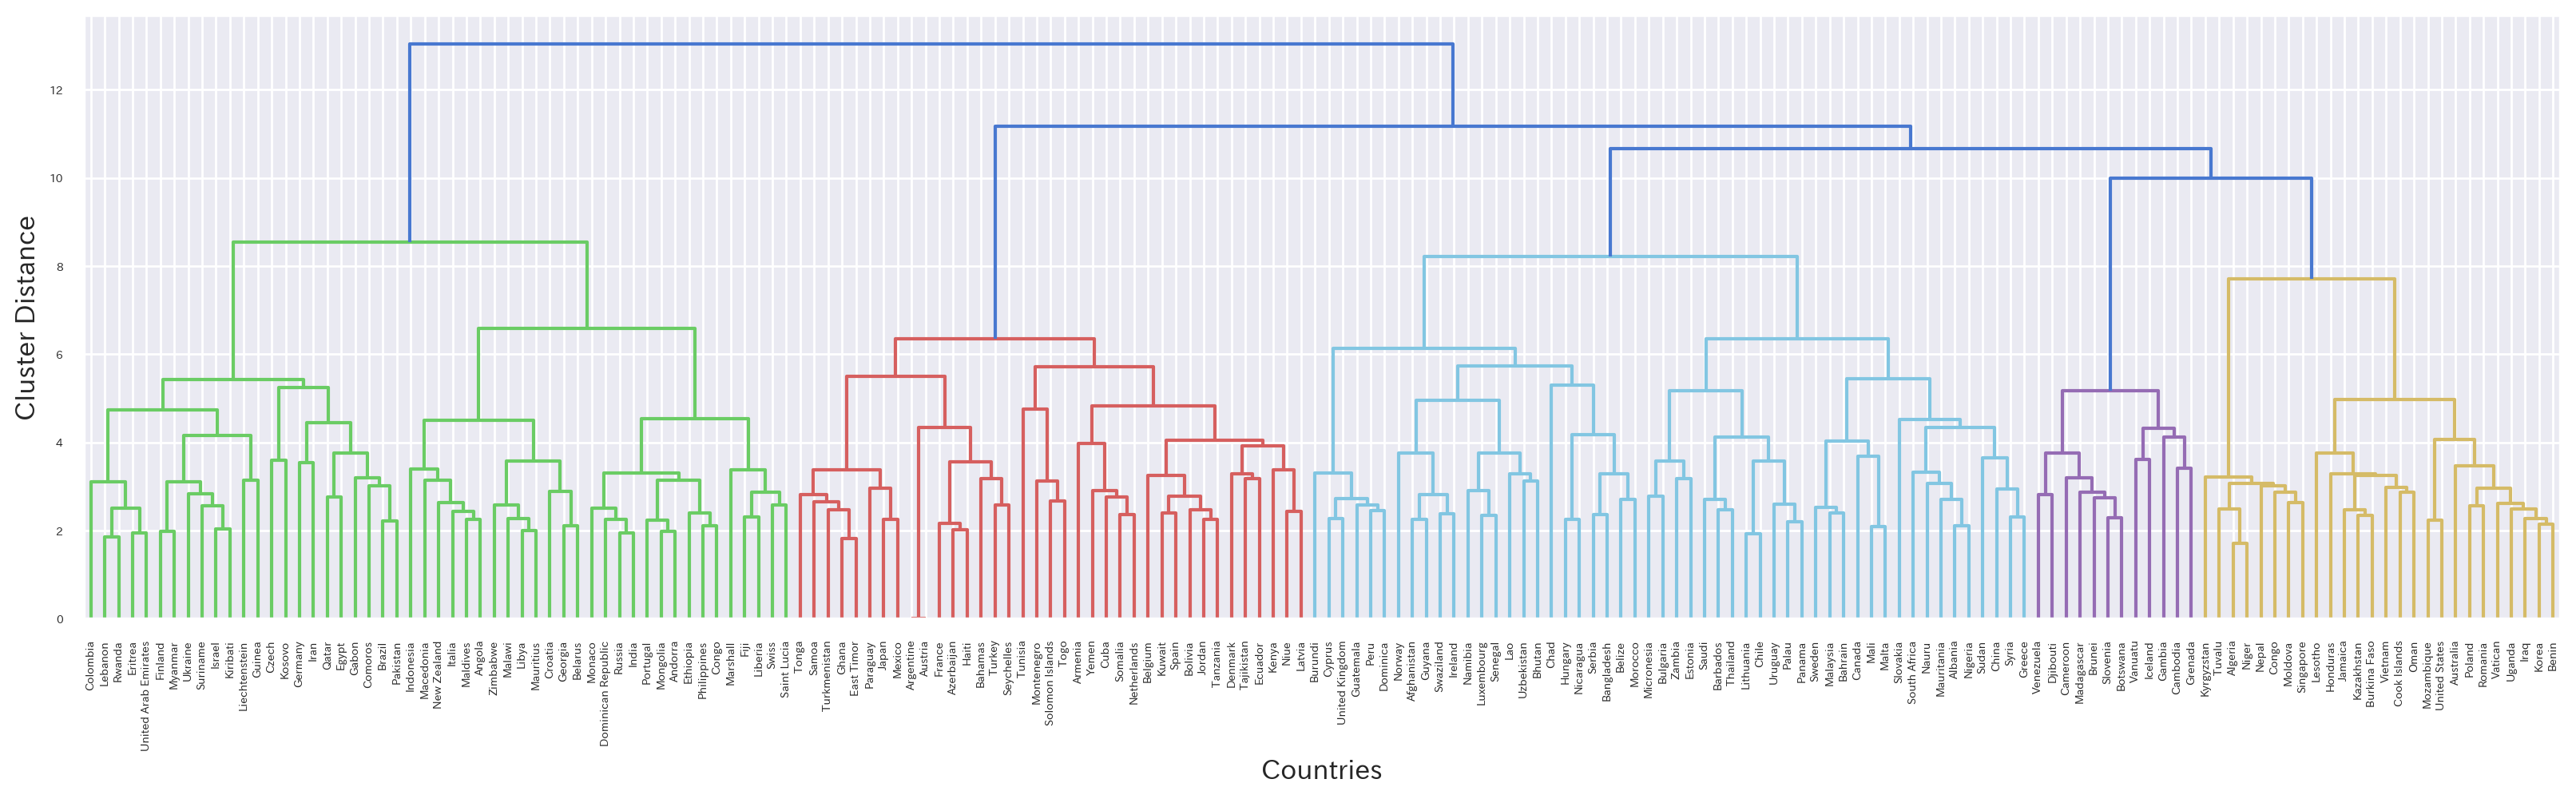

In [58]:
linkage = ward(X_country)
labels = dendrogram(linkage, no_plot=True)

plt.figure(dpi=200, figsize=(20,5))
dendrogram(linkage, labels=[countries[int(label)-1].replace("_", " ")
                            for label in labels["ivl"]])
plt.xlabel("Countries")
plt.ylabel("Cluster Distance")
plt.yticks(fontsize=5)

## [69. t-SNEによる可視化](https://nlp100.github.io/ja/ch07.html#69-t-sne%E3%81%AB%E3%82%88%E3%82%8B%E5%8F%AF%E8%A6%96%E5%8C%96)
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

In [59]:
from sklearn.manifold import TSNE

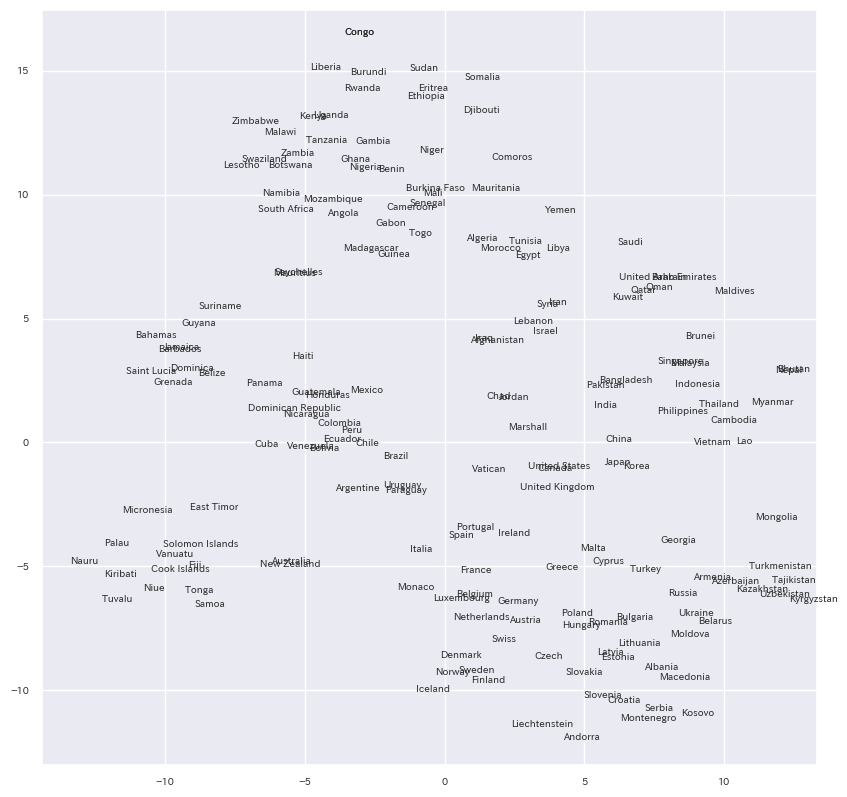

In [60]:
X_embedded = TSNE(random_state=69).fit_transform(X_country)
plt.figure(dpi=100, figsize=(10,10))
plt.xlim(X_embedded[:,0].min()-1, X_embedded[:,0].max()+1)
plt.ylim(X_embedded[:,1].min()-1, X_embedded[:,1].max()+1)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
for idx, country in enumerate(countries):
    plt.text(X_embedded[idx,0], X_embedded[idx,1], country.replace("_", " "), fontsize=7)